In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [20]:
def make_plot_3d(df):
    threedee = plt.figure(figsize=(18, 18)).gca(projection='3d')
    threedee.scatter(df.latitude, df.longitude, df.datetaken)
    threedee.set_xlabel('latitude')
    threedee.set_ylabel('longitude')
    threedee.set_zlabel('datetaken')
    plt.show()

## Исходные данные

Размер данных с дубликатами

In [17]:
df = pd.read_csv('./datasets/geoflickr_spb.csv', index_col=None)
df['datetaken'] = pd.to_datetime(df['datetaken'])
df.head(5)

,Unnamed: 0,accuracy,context,datetaken,datetakengranularity,datetakenunknown,dateupload,description,farm,geo_is_contact,...,ispublic,latitude,longitude,owner,place_id,secret,server,tags,title,woeid
0,0,16,0,2019-01-03 13:40:48,0,0,1546542287,{'_content': ''},5,0,...,1,59.947113,30.339188,9599465@N08,212E_kVYUrwzuEKLlQ,1a2a5928f7,4852,iphone mmxix spb,Recently Added-809,90601223
1,1,16,0,2019-01-03 13:40:31,0,0,1546542275,{'_content': ''},8,0,...,1,59.947044,30.339333,9599465@N08,212E_kVYUrwzuEKLlQ,13da6f248c,7829,iphone mmxix spb,Recently Added-808,90601223
2,2,16,0,2019-01-03 12:25:49,0,0,1546542262,{'_content': ''},5,0,...,1,59.888130,30.331027,9599465@N08,OtBS.PpTU7g9TblR,bb4299c3d0,4844,iphone mmxix spb,Recently Added-807,2123260
3,3,16,0,2019-01-03 12:19:11,0,0,1546542249,{'_content': ''},5,0,...,1,59.888069,30.331208,9599465@N08,OtBS.PpTU7g9TblR,b1824b6053,4856,iphone mmxix spb,Recently Added-806,2123260
4,4,16,0,2019-01-03 11:25:43,0,0,1546542231,{'_content': ''},8,0,...,1,59.888077,30.330625,9599465@N08,OtBS.PpTU7g9TblR,17c1c2bc90,7824,iphone mmxix spb,Recently Added-798,2123260


shape = (кол-во строк, кол-во столбцов)

In [18]:
df.shape

(234946, 26)

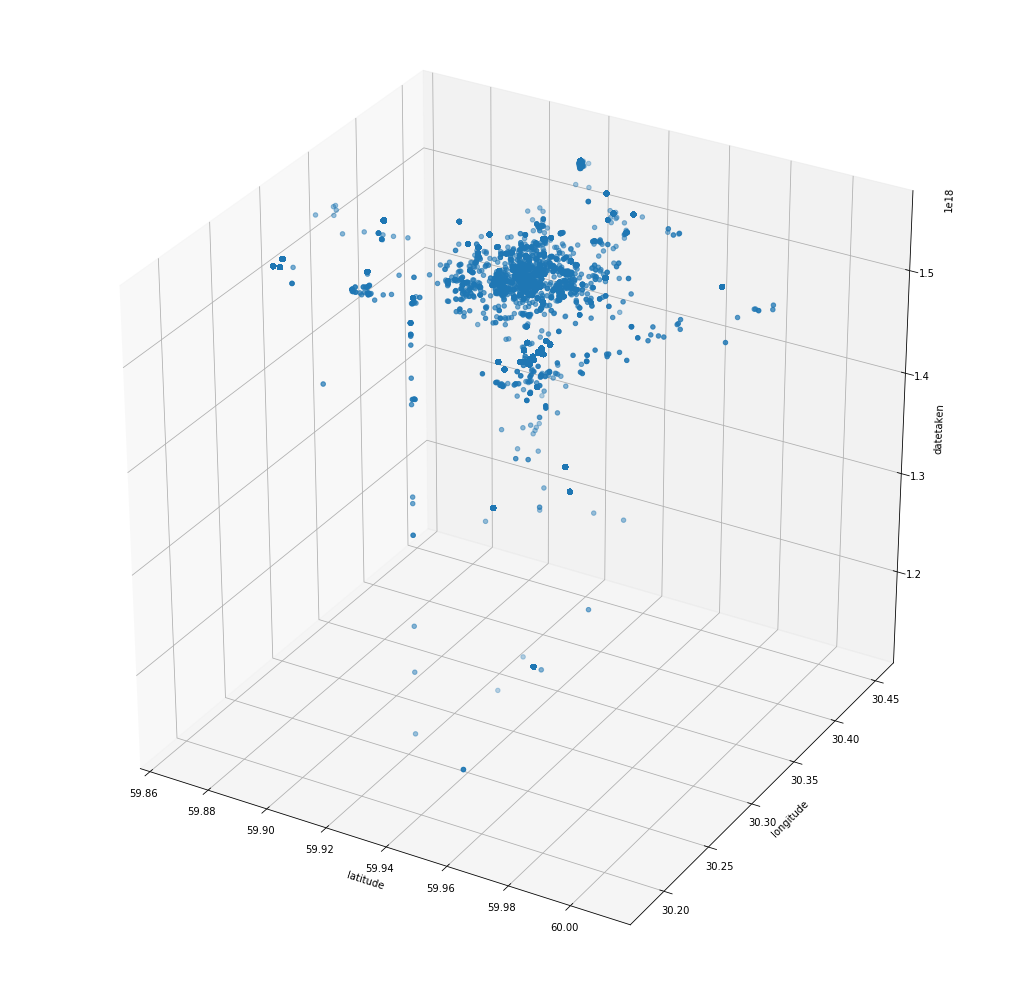

In [21]:
make_plot_3d(df)

## Данные без дубликатов

In [22]:
df_drop = df[['longitude', 'latitude', 'datetaken', 'owner']].drop_duplicates(keep='first')
df_drop.head(5)

,longitude,latitude,datetaken,owner
0,30.339188,59.947113,2019-01-03 13:40:48,9599465@N08
1,30.339333,59.947044,2019-01-03 13:40:31,9599465@N08
2,30.331027,59.888130,2019-01-03 12:25:49,9599465@N08
3,30.331208,59.888069,2019-01-03 12:19:11,9599465@N08
4,30.330625,59.888077,2019-01-03 11:25:43,9599465@N08


In [23]:
df_drop.shape

(2820, 4)

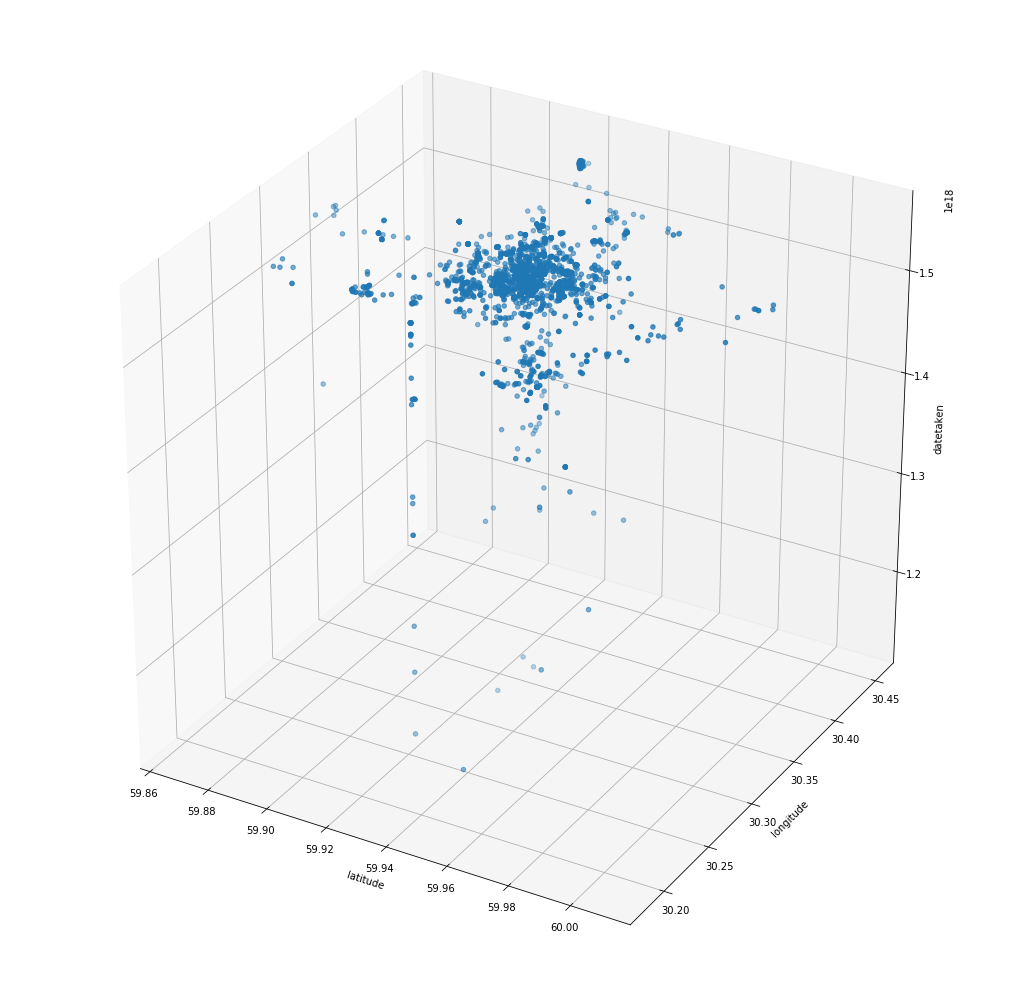

In [24]:
make_plot_3d(df_drop)